# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis (0.5 points)

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
data = pd.read_csv('petrol.csv')
print(data.head())
data.describe()

   tax   income   highway     dl   consumption
0  9.0     3571      1976  0.525           541
1  9.0     4092      1250  0.572           524
2  9.0     3865      1586  0.580           561
3  7.5     4870      2351  0.529           414
4  8.0     4399       431  0.544           410


,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


C:\Users\rwuser2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


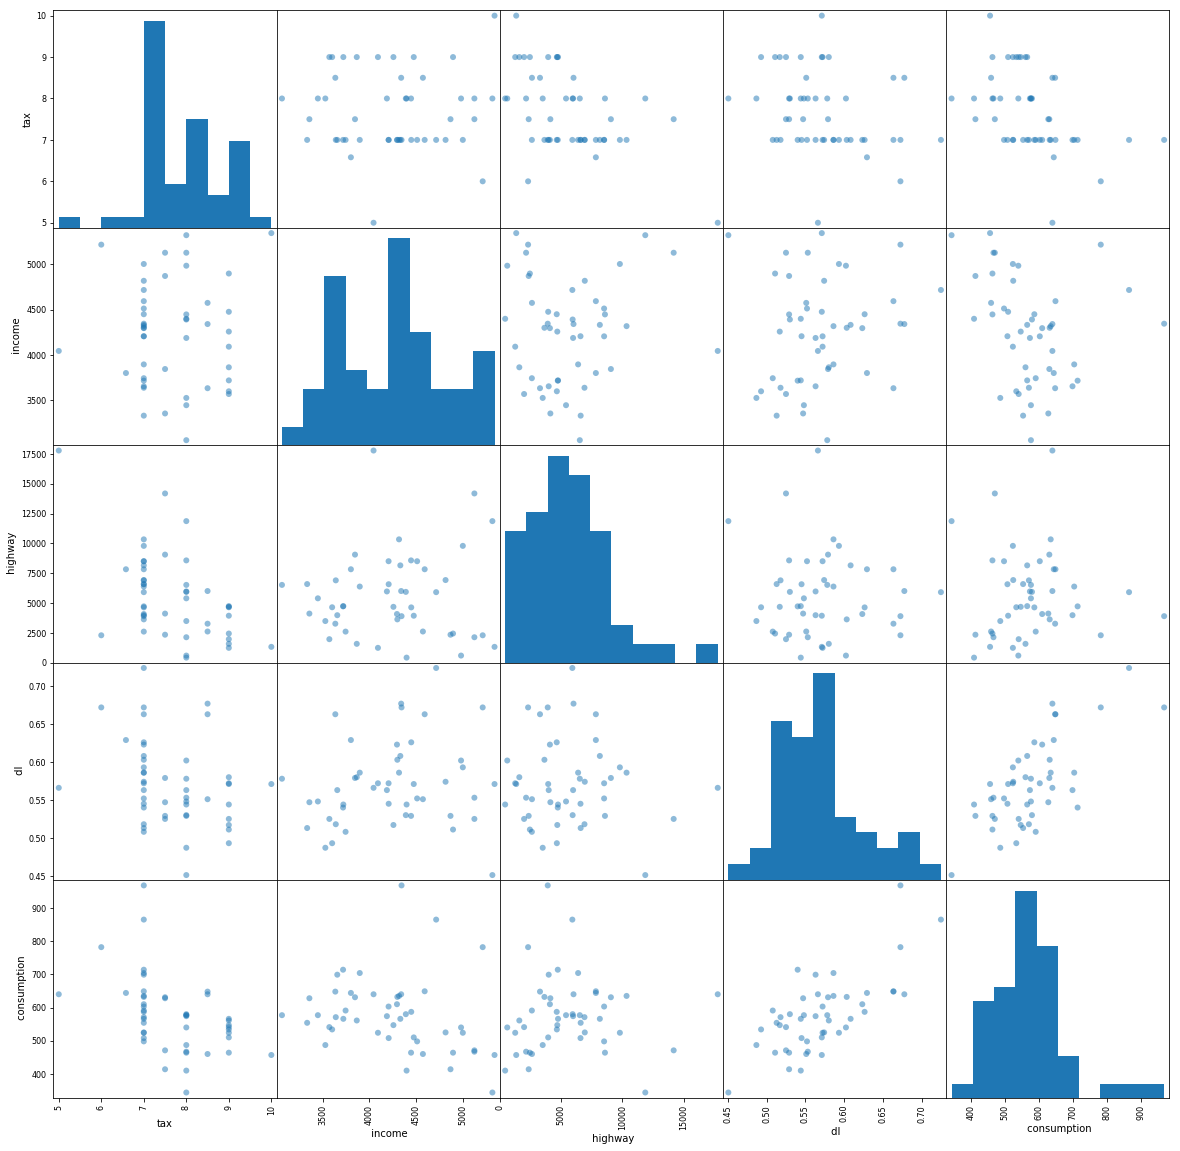

In [2]:
splt = pd.scatter_matrix(data, figsize=(20, 20), marker='o')

# Question 2 - Cap outliers (0.5 points)

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [3]:
def remove_outlier(df, col_name):
   q1 = df[col_name].quantile(0.25)
   q3 = df[col_name].quantile(0.75)
   IQR = q3-q1 #Interquartile range
   lowVal  = q1-1.5*IQR
   highVal = q3+1.5*IQR
   retain = df.loc[(df[col_name] > lowVal) & (df[col_name] < highVal)]
   return retain

for col in data.columns:
    data = remove_outlier(data, col)
    print (len(data))
data

46
46
45
44
42


,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498
10,8.00,4391,5939,0.530,580
12,7.00,4817,6930,0.574,525


# Question 3 - Independent variables and collinearity (0.5 points)
Which attributes seems to have stronger association with the dependent variable consumption?

In [4]:
data.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.133841,-0.443926,-0.316342,-0.463247
income,-0.133841,1.000000,-0.076862,0.296002,-0.254464
highway,-0.443926,-0.076862,1.000000,0.133983,0.215182
dl,-0.316342,0.296002,0.133983,1.000000,0.549161
consumption,-0.463247,-0.254464,0.215182,0.549161,1.000000


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset (0.5 points)
Divide the data into feature(X) and target(Y) sets.

In [5]:
data.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
X = data.loc[:,["tax", " dl"]]
X.head()

,tax,dl
0,9.0,0.525
1,9.0,0.572
2,9.0,0.580
3,7.5,0.529
4,8.0,0.544


In [7]:
Y = data.iloc[:,-1]
Y.head()

0    541
1    524
2    561
3    414
4    410
Name:  consumption, dtype: int64

In [8]:
type(X)

pandas.core.frame.DataFrame

In [10]:
type(Y)

pandas.core.series.Series

# Question 5 - Split data into train, test sets (0.5 points)
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)  

print(X_train)


     tax   income   highway     dl
1   9.00     4092      1250  0.572
37  7.00     3897      6385  0.586
29  9.00     3601      4650  0.493
27  7.50     3846      9061  0.579
12  7.00     4817      6930  0.574
31  7.00     3333      6594  0.513
2   9.00     3865      1586  0.580
8   8.00     4447      8577  0.529
10  8.00     4391      5939  0.530
14  7.00     4332      8159  0.608
15  7.00     4318     10340  0.586
3   7.50     4870      2351  0.529
34  8.00     3528      3495  0.487
22  9.00     4897      2449  0.511
30  7.00     3640      6905  0.518
19  8.50     4341      6010  0.677
7   8.00     5126      2138  0.553
38  8.50     3635      3274  0.663
40  7.00     4449      4639  0.626
9   7.00     4512      8507  0.552
35  6.58     3802      7834  0.629
42  7.00     4300      3635  0.603
25  9.00     3721      4746  0.544
33  7.50     3357      4121  0.547
46  7.00     4296      4083  0.623
26  8.00     3448      5399  0.548
44  6.00     5215      2302  0.672
4   8.00     4399   

In [23]:
print(X_train.shape)
print(X_test.shape)


(33, 4)
(9, 4)


# Question 6 - Build Model (0.5 points)
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [12]:
from sklearn.linear_model import LinearRegression  
reg1 = LinearRegression()  
lm = reg1.fit(X_train, y_train)  

In [13]:
coeff_df = pd.DataFrame(reg1.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
tax,-24.354164
dl,823.823993


# R-Square 

# Question 7 - Evaluate the model (0.5 points)
Calculate the accuracy score for the above model.

In [14]:
r2 = reg1.score(X_train,y_train)
print(r2)


0.4354361212265806


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [18]:

# select feature variables
X = data.iloc[:,:-1]
# print(X.head())

# dependent variable
Y = data.iloc[:,-1]
# print(Y.head())

# split train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)  
# print(X_train.shape)
# print(X_test.shape)

# Model
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train)

# R-Square and Adjusted R-Square scores
r2 = reg.score(X_train,y_train)
print(r2)


0.6669400847971801


# Question 9: Print the coefficients of the multilinear regression model (0.5 points)

In [19]:
coeff_df = pd.DataFrame(reg.coef_, X.columns)  
coeff_df

,0
tax,-31.244358
income,-0.068288
highway,-0.003385
dl,1164.996900


# Question 10 (0.5 points)
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

#### R squared value increase if we increase the number of independent variables to our analysis